# Functions and Modules
### Wind-Driven Ocean Dynamics: Ekman Transport and Vertical Motion

Having learned to read data, compute, and plot maps, from both, SST and Wind, we are coming back to wind. 

Firs of all, we reproduce the plot we have created in Session1.

In [78]:
# Standard libraries
import os


# Scientific libraries
import numpy as np


import xarray as xr


#Visualization libraries

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

## datapath and filename
datapath = '../Data/Wind'
filename = "cmems_obs-wind_glo_phy_my_l4_P1M_202301.nc"

#shapefile = '../Data/110m_cultural/ne_110m_admin_0_countries.shp'

In [79]:
#run the cell
full_path = os.path.join(datapath, filename)
ds = xr.open_dataset(full_path)

In [80]:
#run this cell
wind_speed = np.sqrt(ds.eastward_wind[0,:,:]**2 + ds.northward_wind[0,:,:]**2)
# update attributes
wind_speed.attrs['units'] = 'm s-1'
wind_speed.attrs['long_name'] = 'Wind Speed'

In [81]:
wind_speed

<xarray.DataArray (lat: 720, lon: 1440)> Size: 8MB
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [3.11178405, 3.11207326, 3.11242671, ..., 3.10427125, 3.1044001 ,
        3.10459337],
       [2.94457128, 2.94687971, 2.94687971, ..., 2.93209822, 2.93424607,
        2.94232901],
       ...,
       [6.55570744, 6.55396826, 6.55147312, ..., 6.55433444, 6.55133574,
        6.55842969],
       [6.59382287, 6.59134281, 6.58899841, ..., 6.59212409, 6.59918934,
        6.59643843],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])
Coordinates:
    time     datetime64[ns] 8B 2023-01-16T12:00:00
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Attributes:
    units:      m s-1
    long_name:  Wind Speed

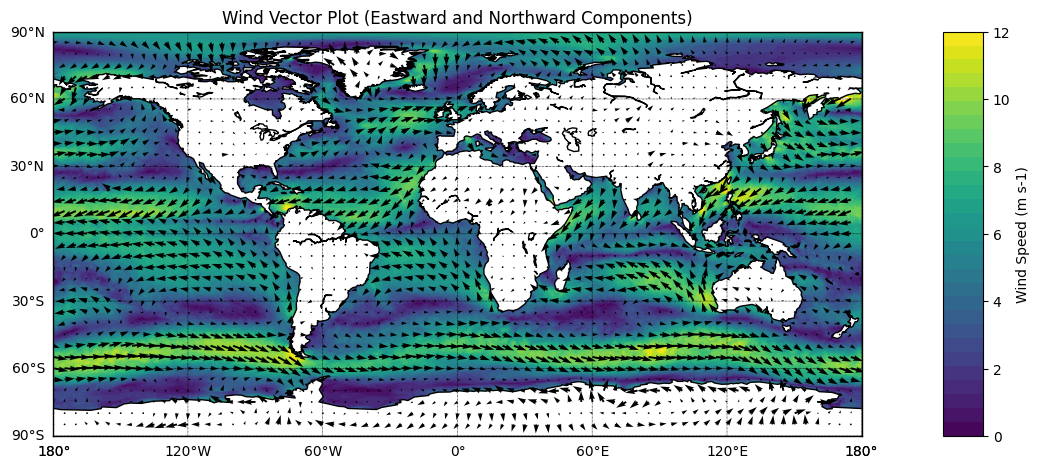

In [82]:
# run this cell


# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 7))

# Create a basemap instance (PlateCarree projection, which matches our lat/lon grid)
m = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c', ax=ax)
# Draw coastlines and fill continents

#m.fillcontinents(color='white')
m.drawcoastlines()
# Draw map boundaries and lat/lon gridlines
m.drawmapboundary()
m.drawparallels(np.arange(-90., 91., 30.), labels=[1,0,0,0], linewidth=0.5)
m.drawmeridians(np.arange(-180., 181., 60.), labels=[0,0,0,1], linewidth=0.5)

# Get the longitude and latitude data from the dataset
pu, pv = ds.eastward_wind[0, ::20, ::20], ds.northward_wind[0, ::20, ::20]  # Slicing the wind data for clarity

# Convert the longitude and latitude from the xarray dataset for the quiver plot
lon = ds.coords['lon'].values[::20]
lat = ds.coords['lat'].values[::20]
lon2d, lat2d = np.meshgrid(lon, lat)  # Create a meshgrid for quiver plotting
# Create a meshgrid for plotting
lon2dc, lat2dc = np.meshgrid(wind_speed.lon, wind_speed.lat)

# Transform the coordinates into the Robinson projection
x, y = m(lon2dc, lat2dc)
levels = np.linspace(0, 12, 30)
cs = m.contourf(x, y, wind_speed, cmap='viridis', levels=levels)
# Add a color bar for the contourf plot
cbar = m.colorbar(cs, location='right', pad="10%",ticks=np.arange(0, 14, 2))
cbar.set_label(f'Wind Speed ({wind_speed.units})')
# After contourf, fill continents with white
m.fillcontinents(color='white')
# Quiver plot with wind vectors (zonal and meridional wind components)
quiver_plot = ax.quiver(lon2d, lat2d, pu, pv, scale=500)

# Set labels and title
plt.title('Wind Vector Plot (Eastward and Northward Components)')

# Show the plot
plt.show()

Wind greatly affects the ocean, influencing currents, surface mixing, and upwelling/downwelling.

**1. Immediate Response: Langmuir Circulation**
Ocean reacts to wind on a small scale through Langmuir Circulation. This results in swirling motions in the water, affecting mixing and the distribution of particles and nutrients in the upper ocean.

**2. Wind Forcing and Ekman Dynamics:**
On time scales longer than hours, the question arises: How does the ocean respond to wind stress? and what is wind stress?

Wind Stress: Wind stress refers to the force exerted by the wind on the ocean surface. It is the result of friction between the moving air and the water, which transfers momentum from the atmosphere to the ocean. 


Ekman Layer: This is a layer in the ocean where the flow is affected by the balance between wind stress, Coriolis effect, and viscous forces. Within the Ekman layer, the water velocity spirals with depth, a phenomenon called the Ekman spiral.

Ekman Transport ($M_x, M_y$): This refers to the net water transport perpendicular to the wind direction. It's a result of the balance between wind stress and the Coriolis effect. The Ekman transport can be represented by the equations:
$$
M_x = -\frac{\tau_y}{\rho_{water} \cdot f}
$$  

$$
M_y = \frac{\tau_x}{\rho_{water} \cdot f}
$$  
where $\rho_{water}$ is water density, $\tau_x$ and $\tau_y$ are the wind stress components, and $f$ is the Coriolis parameter.

**Note:** Here we assume, that the transport is uniform across the entire Ekman layer, which extends from the ocean surface down to the Ekman depth.For further informations use your favorite search engine and search for Ekman spiral.



Upwelling/Downwelling ($w_E$): When Ekman transport converges or diverges in certain regions, it can lead to vertical motion in the ocean. Convergence leads to downwelling (sinking motion), and divergence leads to upwelling (rising motion). The vertical velocity $w_E$ can be estimated as:  

$$
w_E = \frac{1}{f \cdot \rho_{water}} \left(  \frac{\partial \tau_y}{\partial x} - \frac{\partial \tau_x}{\partial y} \right)
$$

where $\left( \frac{\partial \tau_y}{\partial x} - \frac{\partial \tau_x}{\partial y} \right)$ is the wind stress curl `curl_tau`.


In [77]:
#run the cell

from IPython.display import Image

# How to display an image from a URL
Image(url='https://oceanexplorer.noaa.gov/facts/media/upwelling-800.jpg', width=500, height=300)

Ekman transport moves water at an angle to the wind direction, typically 90 degrees to the right in the Northern Hemisphere and to the left in the Southern Hemisphere, across the depth of the Ekman layer.

Figure modified by D. Reed from image by J. Wallace and S. Vogel, El Niño and Climate Prediction. Image courtesy of Sanctuary Quest 2002, NOAA/OER. and included in this notebook via https://oceanexplorer.noaa.gov/facts/upwelling.html

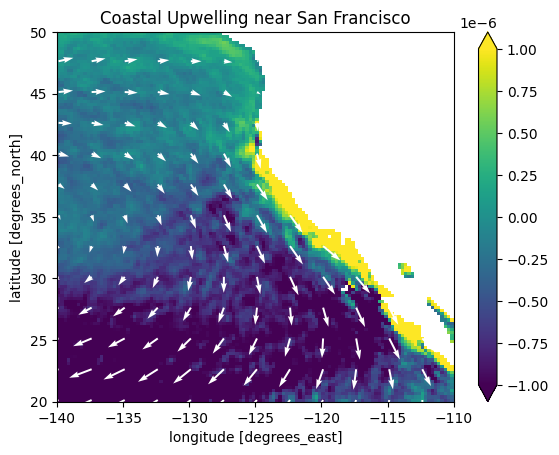

In [56]:
from IPython.display import Image, display

# Image path
image_path = "../Figures/coastal_upwelling_SF.png"

# Display the image
display(Image(filename=image_path))


To understand the ocean's response to wind, it's essential to calculate these Ekman parameters. 
In this session, we'll go through creating functions to compute wind stress and wind stress curl, the Ekman transport and upwelling/downwelling, These functions handle specific tasks and ultimately give us the desired outputs: $M_x, M_y$ and $w_E$. $w_E$ is often called Ekman pumping. 

Within the following code cell, you'll find functions to calculate wind stress, wind stress curl, and horizontal Ekman transport. Familiarize yourself with these functions, review the formulas, and try to understand how the mathematical formulas are translated into Python code.


In [83]:
def compute_windstress(u, v, rho_air=1.293, Cd=1.3e-3):
    """
    Compute wind stress components using 3D xarray DataArrays (e.g., time, lat, lon).
    
    Parameters:
    - u, v: Wind velocity components in m/s (3D xarray.DataArray, e.g., time, lat, lon).
    - rho_air: Air density in kg/m^3. Default is 1.293 kg/m^3.
    - Cd: Drag coefficient. Default is 1.3e-3.
    
    Returns:
    - tau_u, tau_v: Wind stress components in N/m^2 (3D xarray.DataArray).
    """
    
    # Magnitude of wind speed (broadcasting across all dimensions, including time)
    magnitude = np.sqrt(u**2 + v**2)
    
    # Components of wind stress (calculated element-wise over all dimensions)
    tau_u = rho_air * Cd * u * magnitude  # N/m^2 -> kg/m^3*m/s*m/s= kg/(m*s^2)= =N/m^2 with N=kg*m/s^2
    tau_v = rho_air * Cd * v * magnitude  # N/m^2
    
    return tau_u, tau_v




def compute_windstress_curl(tau_u, tau_v):
    """
    Compute the curl of wind stress - spatial var. in wind stress -  using 3D xarray DataArrays.
    
    Parameters:
    - tau_u, tau_v: Wind stress components in N/m^2 (3D xarray.DataArray, e.g., time, lat, lon).
    
    Returns:
    - curl_tau: Curl of wind stress in N/m^3 (3D xarray.DataArray).
    """
    # Automatically detect the dimension names for latitude and longitude
    lat_dim = [dim for dim in tau_u.dims if 'lat' in dim or 'latitude' in dim][0]
    lon_dim = [dim for dim in tau_u.dims if 'lon' in dim or 'longitude' in dim][0]
    
    # Calculate grid resolution
    delta = tau_u[lat_dim].values[1] - tau_u[lat_dim].values[0]


    # Calculate dx and dy  - physical distances corresponding to delta - using Earth's radius
    dx = delta * (np.pi / 180) * 6371e3
    dy = dx  # Assuming square grid
    
    # Central difference method for differentiation (spatial derivatives) using xarray's roll method
    # rate of change of the v-component of wind stress along longitude
    # ∂τ_v / ∂x = [τ_v(i+1, j) - τ_v(i-1, j)] / (2 * dx)
    dtau_v_dx = (tau_v.roll({lon_dim: -1}, roll_coords=False) - tau_v.roll({lon_dim: 1}, roll_coords=False)) / (2 * dx)
    # rate of change of u-component of wind stress along latitude
    # ∂τ_u / ∂y = [τ_u(i, j+1) - τ_u(i, j-1)] / (2 * dy)
    dtau_u_dy = (tau_u.roll({lat_dim: -1}, roll_coords=False) - tau_u.roll({lat_dim: 1}, roll_coords=False)) / (2 * dy)
    # roll shifts data by one grid cell
    
    # The wind stress curl is the difference of the spatial derivative of the meridional wind stress (τv) 
    # in the x-direction and the zonal wind stress (τu) in the y-direction.
    curl_tau = dtau_v_dx - dtau_u_dy  # N/m^3
    
    return curl_tau # 


def compute_ekman_transport(tau_u, tau_v, rho_water=1025):
    """
    Compute Ekman transport using 3D xarray DataArrays.
    
    Parameters:
    - tau_u, tau_v: Wind stress components in N/m^2 (3D xarray.DataArray, e.g., time, lat, lon).
    - rho_water: Seawater density in kg/m^3. Default is 1025 kg/m^3.
    
    Returns:
    - M_u, M_v: Ekman transport components in m^2/s (3D xarray.DataArray).
    - mean_Ekman: Absolute Ekman transport in m^2/s (3D xarray.DataArray).
    """
    
    ###### this part can be copied for the 2. Exercise ###########
    # Automatically detect the dimension name for latitude
    lat_dim = [dim for dim in tau_u.dims if 'lat' in dim or 'latitude' in dim][0]
    
    # Extract latitude values from the tau_u dataset
    lats = tau_u[lat_dim]


    omega = 7.2921e-5  # Earth's angular velocity (rad/s)
    
    # Calculate Coriolis parameter f
    f = 2. * omega * np.sin(np.deg2rad(lats))
    
    # Mask out poles and equator regions to avoid numerical instability where f is zero or undefined
    mask = (np.abs(lats) > 3) & (np.abs(lats) < 87)
    f = xr.where(mask, f, np.nan)
    
    
    # Broadcasting f (which is 1D, depending only on latitude) to match the 3D shape of tau_u (time, lat, lon).
    # This ensures that f is applied across all time and longitude dimensions consistently.
    f_3d = f.broadcast_like(tau_u)  #<- Tip for 2. Exercise replace tau_u by curl_tau
    ##################################################################

    # Calculate Ekman transport over all dimensions (including time)
    M_u = tau_v / (f_3d * rho_water)  # m^2/s
    M_v = -tau_u / (f_3d * rho_water)  # m^2/s
    mean_Ekman = np.sqrt(M_u**2 + M_v**2)
    
    return M_u, M_v, mean_Ekman




In [85]:
ds

<xarray.Dataset> Size: 104MB
Dimensions:                 (time: 1, lat: 720, lon: 1440)
Coordinates:
  * time                    (time) datetime64[ns] 8B 2023-01-16T12:00:00
  * lat                     (lat) float32 3kB -89.88 -89.62 ... 89.62 89.88
  * lon                     (lon) float32 6kB -179.9 -179.6 ... 179.6 179.9
Data variables: (12/13)
    eastward_wind           (time, lat, lon) float64 8MB ...
    eastward_wind_bias      (time, lat, lon) float64 8MB ...
    eastward_wind_sdd       (time, lat, lon) float64 8MB ...
    northward_wind          (time, lat, lon) float64 8MB ...
    northward_wind_bias     (time, lat, lon) float64 8MB ...
    northward_wind_sdd      (time, lat, lon) float64 8MB ...
    ...                      ...
    eastward_stress_bias    (time, lat, lon) float64 8MB ...
    eastward_stress_sdd     (time, lat, lon) float64 8MB ...
    northward_stress        (time, lat, lon) float64 8MB ...
    northward_stress_bias   (time, lat, lon) float64 8MB ...
    northward_stress_sdd    (time, lat, lon) float64 8MB ...
    number_of_observations  (time, lat, lon) float32 4MB ...
Attributes: (12/25)
    title:                       Global Ocean - Wind and Stress - Monthly - F...
    summary:                    Global ocean monthly mean 10-m stress-equival...
    keywords:                   ocean winds, wind stress
    Conventions:                CF-1.6, ACDD-1.3
    project:                    Copernicus Marine Service Wind Thematic Assem...
    institution:                Royal Netherlands Meteorological Institute (K...
    ...                         ...
    time_coverage_start:        2023-01-01T00:00:00
    time_coverage_end:          2023-01-31T23:59:59
    references:                 Copernicus Marine Service Product User Manual...
    history:                    N/A
    date_created:               2023-05-10T11:45:15
    date_modified:              2023-05-10T11:45:15

The docstring allows us to have good documentation for our function:

In [58]:
#run the cell
help(compute_ekman_transport)

Help on function compute_ekman_transport in module __main__:

compute_ekman_transport(tau_u, tau_v, rho_water=1025)
    Compute Ekman transport using 3D xarray DataArrays.

    Parameters:
    - tau_u, tau_v: Wind stress components in N/m^2 (3D xarray.DataArray, e.g., time, lat, lon).
    - rho_water: Seawater density in kg/m^3. Default is 1025 kg/m^3.

    Returns:
    - M_u, M_v: Ekman transport components in m^2/s (3D xarray.DataArray).
    - mean_Ekman: Absolute Ekman transport in m^2/s (3D xarray.DataArray).



**1. Exercise:**   
Calculate wind stress components, wind stress curl and horizontal Ekman transports.


**Hint:**
Which data do you need? Check the input of the functions.

In [59]:
## your code here
#lat = ds.lat
#lon = ds.lon
#u = ds.eastward_wind
#v = ds.northward_wind

 
#tau_u, tau_v = compute_windstress(u,v)
#curl_tau = compute_windstress_curl(tau_u, tau_v)
#M_u, M_v, mean_Ekman = compute_ekman_transport(tau_u, tau_v)

# Alternative:
tau_u, tau_v = compute_windstress(ds.eastward_wind,ds.northward_wind)
curl_tau = compute_windstress_curl(tau_u, tau_v)
M_u, M_v, mean_Ekman = compute_ekman_transport(tau_u, tau_v)

### Debugging

We perform debugging by checking the shape, data types, and contents of the variables to ensure they contain the expected values and dimensions, using techniques like assert to catch errors and ensure data integrity.

In [90]:
print(tau_u.shape)  # Check the shape of the array
print(tau_u.dtype)  # Check the data type (e.g., float64, float32)

(1, 720, 1440)
float64


In [91]:
print(tau_u.values[0,:5, :5])  # Print the first 5x5 block of values

[[       nan        nan        nan        nan        nan]
 [0.01129809 0.01124683 0.01119579 0.01114497 0.01109436]
 [0.00851319 0.00847033 0.00847033 0.00842758 0.00838494]
 [0.00510745 0.0051247  0.00507149 0.00503548 0.00505249]
 [0.00205392 0.00201742 0.00201742 0.0019807  0.0019807 ]]


In [92]:
# Assert checks if the condition is true. If tau_u contains values greater than 1 N/m², 
# the program will raise an AssertionError with the message provided.

assert tau_u.max().values < 1, "Unexpectedly large values in tau_u"

Another form of debugging involves plotting the variables and comparing the results with values from the literature to ensure the calculations align with known data and expected patterns.

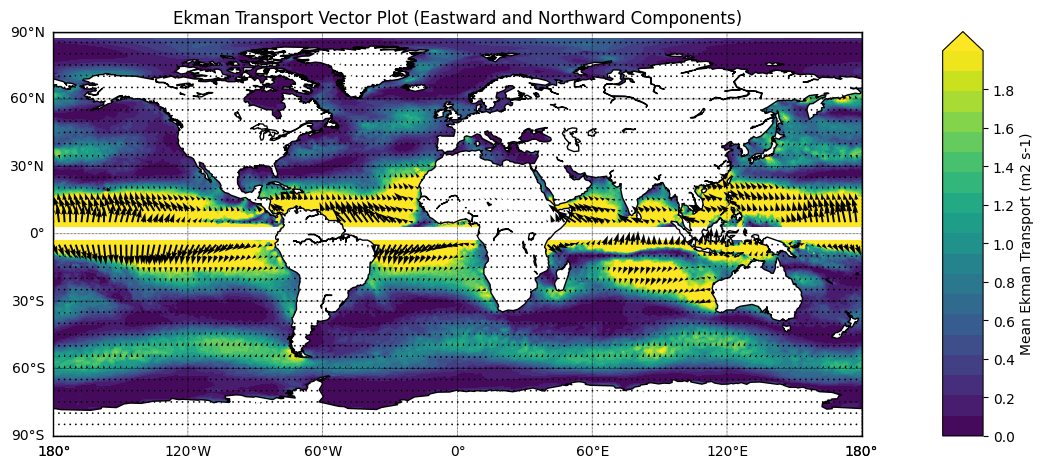

In [93]:
# run this cell


# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 7))

# Create a basemap instance (PlateCarree projection, which matches our lat/lon grid)
m = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c', ax=ax)
# Draw coastlines and fill continents

#m.fillcontinents(color='white')
m.drawcoastlines()
# Draw map boundaries and lat/lon gridlines
m.drawmapboundary()
m.drawparallels(np.arange(-90., 91., 30.), labels=[1,0,0,0], linewidth=0.5)
m.drawmeridians(np.arange(-180., 181., 60.), labels=[0,0,0,1], linewidth=0.5)

# Get the longitude and latitude data from the dataset
pu, pv = M_u[0,::20, ::10], M_v[0,::20, ::10]  # Slicing the wind data for clarity

# Convert the longitude and latitude from the xarray dataset for the quiver plot

# Create a meshgrid for plotting
lon2dc, lat2dc = np.meshgrid(mean_Ekman.lon, mean_Ekman.lat)

# Transform the coordinates into the Robinson projection
x, y = m(lon2dc, lat2dc)
levels = np.linspace(0, 2, 20)
cs = m.contourf(x, y, mean_Ekman[0,:,:], cmap='viridis', levels=levels, extend='max')
# Add a color bar for the contourf plot
cbar = m.colorbar(cs, location='right', pad="10%",ticks=np.arange(0, 2, .2))
cbar.set_label(f'Mean Ekman Transport (m2 s-1)')
# After contourf, fill continents with white
m.fillcontinents(color='white')
# Quiver plot with wind vectors (zonal and meridional wind components)
quiver_plot = ax.quiver(pu.lon, pv.lat, pu, pv, scale=300)

# Set labels and title
plt.title('Ekman Transport Vector Plot (Eastward and Northward Components)')

# Show the plot
plt.show()

Ekman Transport enhanced in near equatorial regions with a transport away from the equator.

Next, we will plot wind stress and wind stress curl:

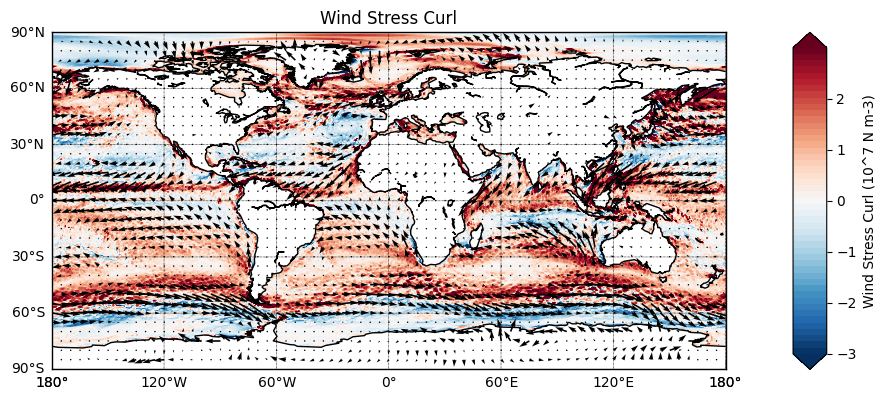

In [94]:
# run this cell


# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Create a basemap instance (PlateCarree projection, which matches our lat/lon grid)
m = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c', ax=ax)
# Draw coastlines and fill continents

#m.fillcontinents(color='white')
m.drawcoastlines()
# Draw map boundaries and lat/lon gridlines
m.drawmapboundary()
m.drawparallels(np.arange(-90., 91., 30.), labels=[1,0,0,0], linewidth=0.5)
m.drawmeridians(np.arange(-180., 181., 60.), labels=[0,0,0,1], linewidth=0.5)

# Get the longitude and latitude data from the dataset
pu, pv = tau_u[0,::20, ::20], tau_v[0,::20, ::20]  # Slicing the wind data for clarity

# Convert the longitude and latitude from the xarray dataset for the quiver plot
  # Create a meshgrid for quiver plotting
# Create a meshgrid for plotting
lon2dc, lat2dc = np.meshgrid(curl_tau.lon, curl_tau.lat)

# Transform the coordinates into the Robinson projection
x, y = m(lon2dc, lat2dc)
levels = np.linspace(-3, 3, 50)
cs = m.contourf(x, y, curl_tau[0,:,:]*1e7, cmap='RdBu_r', levels=levels, extend='both')
# Add a color bar for the contourf plot
cbar = m.colorbar(cs, location='right', pad="10%",ticks=np.arange(-3,3, 1))
cbar.set_label(f'Wind Stress Curl (10^7 N m-3)')
# After contourf, fill continents with white
m.fillcontinents(color='white')
# Quiver plot with wind vectors (zonal and meridional wind components)
quiver_plot = ax.quiver(pu.lon, pu.lat, pu*10**2, pv*10**2, scale=500)

# Set labels and title
plt.title('Wind Stress Curl')

# Show the plot
plt.show()

### Wind Stress Curl and Wind Stress Vector Field for January

This figure shows the wind stress curl overlaid with the wind stress vectors for the month of January 2023.

- Red areas in the Northern Hemisphere, represent regions of positive wind stress curl, indicating divergence of surface water , which often leads to upwelling (water rising) in the ocean. These areas are typically found where winds push surface water apart, creating space for deeper water to rise to the surface in the NH.

- Blue areas in the Northern Hemisphere represent regions of negative wind stress curl, indicating convergence of surface water, which drives downwelling (water sinking). These areas are typically found where winds push surface water together, forcing surface water to sink.

The black arrows show the wind stress vectors, representing the direction and magnitude of wind forcing on the ocean surface. You can observe major wind patterns such as the Trade Winds near the equator and the Westerlies in the mid-latitudes, which play a key role in driving ocean circulation.



**2. Exercise:**  
You computed the wind stress, wind stress curl, and horizontal Ekman transports. Your next objective is to add the calculation for Ekman pumping.

Your task is to create a function that calculates Ekman pumping $w_E$ (vertical Ekman velocity) based on the previously computed `curl_tau`. For this, you will also need the Coriolis Parameter $f$ and the density of water. Both of these parameters have already been determined within the `compute_ekman_transport` function.
Ensure you have already computed the wind stress curl using the `compute_windstress_curl` function before you proceed with this exercise.


$$
w_E = \frac{1}{f \cdot \rho_{water}} \left(  \frac{\partial \tau_y}{\partial x} - \frac{\partial \tau_x}{\partial y} \right)
$$

Name your function `compute_ekman_pumping` that returns `w_E`.

In [95]:
## your function compute_ekman_pumping

def compute_ekman_pumping(curl_tau, rho_water=1025):
    """
    Compute Ekman pumping velocity using 3D xarray DataArrays.
    
    Parameters:
    - curl_tau: Curl of wind stress in N/m^3 (3D xarray.DataArray, e.g., time, lat, lon).
    - rho_water: Water density in kg/m^3. Default is 1025 kg/m^3.
    
    Returns:
    - w_E: Ekman pumping velocity in m/s (3D xarray.DataArray).
    """

    ##### copied from function compute_ekman_transport ###############################################################
    # Automatically detect the dimension name for latitude
    lat_dim = [dim for dim in curl_tau.dims if 'lat' in dim or 'latitude' in dim][0]
    
    # Extract latitude values from the tau_u dataset
    lats = curl_tau[lat_dim]
    omega = 7.2921e-5  # Earth's angular velocity (rad/s)
    
    # Calculate Coriolis parameter f
    f = 2. * omega * np.sin(np.deg2rad(lats))
    
    # Mask out poles and equator regions
    mask = (np.abs(lats) > 3) & (np.abs(lats) < 87)
    f = xr.where(mask, f, np.nan)
    
    # Broadcasting f (which is 1D, depending only on latitude) to match the 3D shape of curl_tau (time, lat, lon).
    # This ensures that f is applied across all time and longitude dimensions consistently.
    f_3d = f.broadcast_like(curl_tau)
    ###########################################################################################################################

    # Compute Ekman pumping velocity over all dimensions (including time)
    w_E = curl_tau / (rho_water * f_3d)  # m/s#
    #w_E = 1/(rho_water * f_3d)* curl_tau
    
    return w_E


In [ ]:
# your computation of Ekman Pumping here

w_E = compute_ekman_pumping(curl_tau)

In [97]:
np.nanmean(w_E.values)

3.925745178093167e-08

In [98]:
w_E.mean(dim=['time','lat','lon'])

<xarray.DataArray ()> Size: 8B
array(3.92574518e-08)

In [69]:
w_E.std(dim=['time','lat','lon'])

<xarray.DataArray ()> Size: 8B
array(3.79893627e-06)

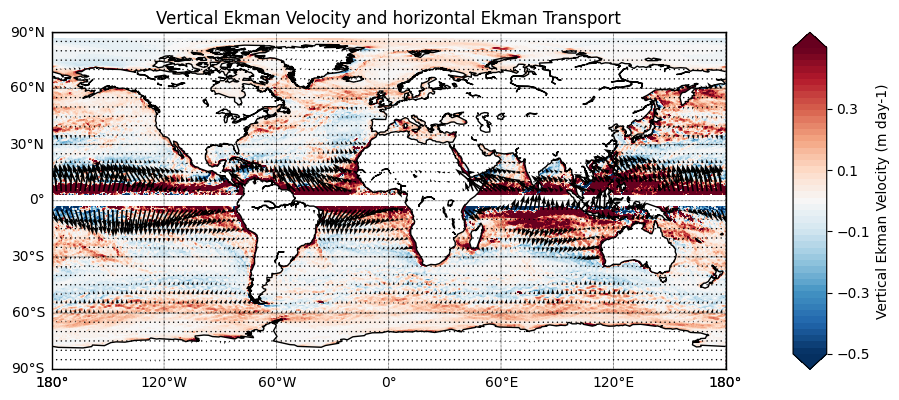

In [99]:
# run the cell to plot vertical Ekman velocity
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Create a basemap instance (PlateCarree projection, which matches our lat/lon grid)
m = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c', ax=ax)
# Draw coastlines and fill continents

#m.fillcontinents(color='white')
m.drawcoastlines()
# Draw map boundaries and lat/lon gridlines
m.drawmapboundary()
m.drawparallels(np.arange(-90., 91., 30.), labels=[1,0,0,0], linewidth=0.5)
m.drawmeridians(np.arange(-180., 181., 60.), labels=[0,0,0,1], linewidth=0.5)

# Get the longitude and latitude data from the dataset
pu, pv = M_u[0,::20, ::10], M_v[0,::20, ::10]  # Slicing the wind data for clarity

# Convert the longitude and latitude from the xarray dataset for the quiver plot

# Create a meshgrid for plotting
lon2dc, lat2dc = np.meshgrid(w_E.lon, w_E.lat)

# Transform the coordinates into the Robinson projection
x, y = m(lon2dc, lat2dc)
levels = np.linspace(-.5, .5, 50)
cs = m.contourf(x, y, w_E[0,:,:]*60*60*24, cmap='RdBu_r', levels=levels, extend='both')
# Add a color bar for the contourf plot
cbar = m.colorbar(cs, location='right', pad="10%",ticks=np.arange(-.5, .5, .2))
cbar.set_label(f'Vertical Ekman Velocity (m day-1)')
# After contourf, fill continents with white
m.fillcontinents(color='white')
# Quiver plot with wind vectors (zonal and meridional wind components)
quiver_plot = ax.quiver(pu.lon, pu.lat, pu, pv, scale=200)

# Set labels and title
plt.title('Vertical Ekman Velocity and horizontal Ekman Transport')

# Show the plot
plt.show()


### Vertical Ekman Velocity and Horizontal Ekman Transport

This map visualizes the vertical Ekman velocity (color) and the horizontal Ekman transport (black arrows) on a global scale.

Red areas represent regions of upwelling, where surface water diverges, causing deeper water to rise. This is especially visible along the equator, where upwelling plays a crucial role in marine productivity.

Blue areas indicate downwelling, where surface water converges and is pushed downward. Subtropical gyres, particularly visible around 30°N and 30°S, are regions where this process typically occurs.

The black arrows show the horizontal Ekman transport, which is perpendicular to the wind stress and moves water either towards or away from the areas of convergence or divergence.


**Combine Computations into a Single Function**  
To create a more streamlined and modular workflow, you'll consolidate the Ekman-related calculations into a single function. Here's a step-by-step guide:

**Setup:** Review the individual functions we've discussed: those for calculating wind stress, wind stress curl, Ekman transport, and Ekman pumping velocity. Understand their inputs and outputs to ensure seamless integration within the consolidated function.  

**Function Creation:** We develop a new function named `compute_ekman_properties`. This function should accept as its inputs the eastward and northward wind components (`u, v`), and any other required parameters. Possible Docstring for our function:  
 
    """
    Compute Ekman transport and Ekman pumping from wind velocity components.
    
    Parameters:
    - u, v: Wind velocity components in m/s (3D xarray.DataArray: time, lat, lon).
    - Cd: Drag coefficient. Default is 1.3e-3.
    - rho_water: Water density in kg/m^3. Default is 1025 kg/m^3.
    
    Returns:
    - curl_tau: Wind stress curl in N/m^3 (3D xarray.DataArray: time, lat, lon).
    - M_u, M_v: Ekman transport components in m^2/s (3D xarray.DataArray: time, lat, lon).
    - mean_Ekman: Absolute Ekman transport in m^2/s (3D xarray.DataArray: time, lat, lon).
    - w_E: Ekman pumping velocity in m/s (3D xarray.DataArray: time, lat, lon).
    """
   

Within this main function, we invoke the specific functions to compute wind stress, wind stress curl, Ekman transport, and Ekman pumping velocity. Return the results: Wind stress curl `curl_tau`, the  Ekman transport components `M_u` and `M_v`, the magnitude of horizontal Ekman transport `mean_Ekman` and the Ekman pumping velocity `w_E`.

**Test:** After creating the function, we test it using our dataset to ensure it returns the expected results and functions properly.


The goal is to simplify the workflow. By consolidating these calculations into a single function, we'll enhance the code's readability and efficiency.


In [100]:
def compute_ekman_properties(u, v, rho_air=1.293, Cd=1.3e-3, rho_water=1025):
    """
    Compute Ekman transport and Ekman pumping from wind velocity components.
    
    Parameters:
    - u, v: Wind velocity components in m/s (3D xarray.DataArray: time, lat, lon).
    - Cd: Drag coefficient. Default is 1.3e-3.
    - rho_water: Water density in kg/m^3. Default is 1025 kg/m^3.
    
    Returns:
    - curl_tau: Wind stress curl in N/m^3 (3D xarray.DataArray: time, lat, lon).
    - M_u, M_v: Ekman transport components in m^2/s (3D xarray.DataArray: time, lat, lon).
    - mean_Ekman: Absolute Ekman transport in m^2/s (3D xarray.DataArray: time, lat, lon).
    - w_E: Ekman pumping velocity in m/s (3D xarray.DataArray: time, lat, lon).
    """
    
    # Compute wind stress
    tau_u, tau_v = compute_windstress(u, v, rho_air, Cd)
    
    # Compute curl of wind stress
    curl_tau = compute_windstress_curl(tau_u, tau_v,)
    
    # Compute Ekman transport
    M_u, M_v, mean_Ekman = compute_ekman_transport(tau_u, tau_v)

    
    # Compute Ekman pumping velocity
    w_E = compute_ekman_pumping(curl_tau, rho_water)

    
    return curl_tau, M_u, M_v, mean_Ekman, w_E


In [101]:
#calculation of all Ekman properties by using the compute_ekman_properties function
curl_tau, M_u, M_v,mean_Ekman, new_w_E = compute_ekman_properties(ds.eastward_wind, ds.northward_wind)

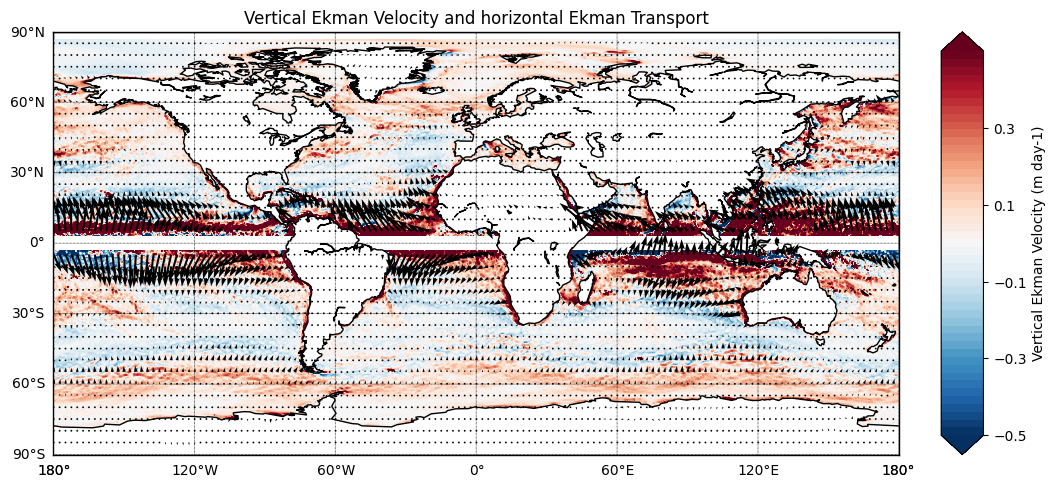

In [102]:

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 7))

# Create a basemap instance (PlateCarree projection, which matches our lat/lon grid)
m = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c', ax=ax)
# Draw coastlines and fill continents

#m.fillcontinents(color='white')
m.drawcoastlines()
# Draw map boundaries and lat/lon gridlines
m.drawmapboundary()
m.drawparallels(np.arange(-90., 91., 30.), labels=[1,0,0,0], linewidth=0.5)
m.drawmeridians(np.arange(-180., 181., 60.), labels=[0,0,0,1], linewidth=0.5)

# Get the longitude and latitude data from the dataset
pu, pv = M_u[0,::20, ::10], M_v[0,::20, ::10]  # Slicing the wind data for clarity



# Create a meshgrid for plotting
lon2dc, lat2dc = np.meshgrid(new_w_E.lon, new_w_E.lat)

# Transform the coordinates into the Robinson projection
x, y = m(lon2dc, lat2dc)
levels = np.linspace(-.5, .5, 50)
cs = m.contourf(x, y, new_w_E[0,:,:]*60*60*24, cmap='RdBu_r', levels=levels, extend='both')
# Add a color bar for the contourf plot
cbar = m.colorbar(cs, location='right', pad="5%",ticks=np.arange(-.5, .5, .2))
cbar.set_label(f'Vertical Ekman Velocity (m day-1)')
# After contourf, fill continents with white
m.fillcontinents(color='white')
# Quiver plot with wind vectors (zonal and meridional wind components)
quiver_plot = ax.quiver(pu.lon, pu.lat, pu, pv, scale=200)

# Set labels and title
plt.title('Vertical Ekman Velocity and horizontal Ekman Transport')

# Show the plot
plt.show()


From the data presented, we can make several important observations regarding oceanic movements:

**Vertical Ekman Velocity:**
        Positive values denote an upward movement, known as upwelling. This is a process by which deeper, cooler, and often nutrient-rich water moves towards the surface.
        Conversely, negative values indicate downwelling, where surface water moves downwards.

**Ekman Transport Vectors:**
        These vectors are oriented away from the equator and the subpolar regions, directing towards the central ocean basins. In these regions, the vertical Ekman velocity is predominantly negative, suggesting downwelling activities.

**Subtropical Gyres Dynamics:**
        In the central parts of the subtropical gyres, water is observed to move downwards. This is driven by horizontal transports in the upper layer converging towards the gyre's center.

**Trade Winds Regions:**
        Here, upwelling is the dominant phenomenon. Water masses are transported northward north of the equator and southward south of the equator. This leads to divergence, resulting in Ekman upwelling - a positve vertical Ekman velocity.
        
**Ekman Transport Near the Equator:**
        It's important to note that both horizontal Ekman transports and vertical Ekman velocities are not calculated at the equator. This is because the Coriolis parameter (f) approaches zero at the equator, which causes the standard Ekman theory to break down in this region. Thus, the conventional equations governing Ekman dynamics are not directly applicable at the equator.

In essence, these patterns are for example crucial for understanding the distribution of heat and nutrients in the oceans, both of which have significant impacts on marine life and climate.

**Comparison to Wind Stress Curl:**
The spatial patterns between `curl_tau` and `w_e` display similarities. But a negative `curl_tau` in the Northern Hemisphere indicates downwelling. This is where warmer surface waters are pushed downwards, resulting in convergence. In the Southern Hemisphere a positive `curl_tau` corresponds to downwelling. This difference in behavior between the Northern Hemisphere and Southern Hemisphere arises from the Coriolis effect. Due to Earth's rotation, the Coriolis force acts to the right of the flow in the Northern Hemisphere and to the left in the Southern Hemisphere, leading to opposite oceanic responses to wind-driven forcing in each hemisphere.


# Creating and Utilizing Custom Python Modules

Throughout this notebook, we've made extensive use of functions to keep our code organized and avoid repetition. But what if we need these functions in future projects? Instead of repeatedly copying and pasting, we can use Python modules.

Here's a brief guide on creating your own module:

1. Gather functions: Collect all the functions you might want to reuse. For this discussion, consider those related to Ekman dynamics.

2. Create a .py-script: Open a new file in your code editor. Transfer all the functions into this file. Name it descriptively, like `ekman_dynamics.py`. Include also the import of all necessary libraries (`import numpy as np` and also xarray).

3. Ensure proper directory placement: To effortlessly import the module, the script should be in teh Modules folder.

By organizing functions into modules, your code remains clean, and reusing functions across projects becomes a breeze.

**3. Exercise:**  
Create your own Python module:

    Follow the instructions above to gather all relevant functions into a Python module called ekman_dynamics.py. Ensure that you also include all necessary imports like numpy, xarray.

Place the module in the Modules folder:

    Make sure to save the module in the Modules directory so it can be imported into future notebooks.

In [74]:
ds.close()